In [1]:
import math
from numpy import mgrid
import scipy.io as sio
import numpy as np
import cv2
from numpy import mgrid
import matplotlib.pyplot as plt

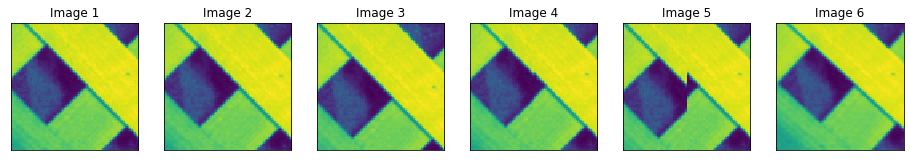

In [2]:
#Load Data

mdict = sio.loadmat("./imgs_for_optical_flow.mat")
image1 = mdict["img1"]
image2 = mdict["img2"]
image3 = mdict["img3"]
image4 = mdict["img4"]
image5 = mdict["img5"]
image6 = mdict["img6"]

x = []
x.append(image1)
x.append(image2)
x.append(image3)
x.append(image4)
x.append(image5)
x.append(image6)
labes = ['original', 'opencv Remap', 'my interpolation']
fig, ax = plt.subplots(1, 6, figsize=(16, 6))

for i, Temp in enumerate(range(6)):
    t = ax[i].imshow(x[i], interpolation="None")
    ax[i].set_xticks([]), ax[i].set_yticks([])
    ax[i].set_title("Image " + str(i+1))

plt.show()

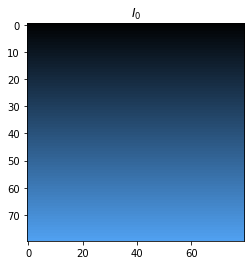

In [120]:
SIZE = 80
I0 = np.zeros((SIZE,SIZE,3), 'uint8')
# print(I)

# I[...,0] = np.ones((SIZE,SIZE))*10 # R
# I[...,1] = np.ones((SIZE,SIZE))*20 # G
# I[...,2] = np.ones((SIZE,SIZE))*30 # B
# print(I[...,0])

R = 1

for i in range(SIZE):
    for j in range(SIZE):
        I0[i,j,0] = np.clip(I0[np.clip(i-1,0,SIZE-1),j,0] + R,0, 255) # R
        I0[i,j,1] = np.clip(I0[np.clip(i-1,0,SIZE-1),j,1] + R*2,0, 255) # G
        I0[i,j,2] = np.clip(I0[np.clip(i-1,0,SIZE-1),j,2] + R*3,0, 255) # B

_ = plt.imshow(I0, interpolation="None")
_ = plt.title("$I_{0}$")

In [144]:
a = np.array([1,1,1,1,1,1,1])
# np.count_nonzero(a==1) == len(a)
a.all()

True

In [141]:
diff = []
for i in range(1,SIZE):
    for j in range(1,SIZE):
        r = I0[i,j,:] - I0[i-1,j,:]
        if len(diff) > 0 and r != diff[0]:
            print(r)
        diff.append(I0[i,j,:] - I0[i-1,j,:])
# np.count_nonzero(diff == diff[0]) == len(diff)
# len(diff == diff[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

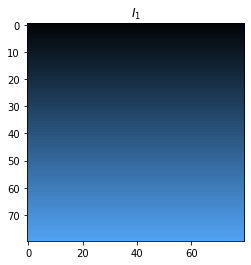

In [119]:
I1 = np.zeros((SIZE,SIZE,3), 'uint8')
T = 15
for i in range(SIZE):
    for j in range(SIZE):
        I1[i,j,0] = np.clip(I0[i,j,0] + R, 0, 255) # R
        I1[i,j,1] = np.clip(I0[i,j,1] + R*2, 0, 255) # G
        I1[i,j,2] = np.clip(I0[i,j,2] + R*3, 0, 255) # B
        
_ = plt.imshow(I1, interpolation="None")
_ = plt.title("$I_{1}$")

In [118]:
for i in range(1,SIZE):
    for j in range(1,SIZE):
        diff = I1[i,j,:] - I0[i,j,:]
        print(diff)

[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[19 38 57]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]
[21 42 63]

[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 49  98 147]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 102 153]
[ 51 1

[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 77 154 162]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 158 159]
[ 79 1

[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[107 163 117]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 161 114]
[109 1

[143 127  63]
[143 127  63]
[143 127  63]
[143 127  63]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 125  60]
[145 1